Most of this code can be found at <a href='https://keras.io'>keras.io</a>

## Questions


## Objectives 
YWBAT 
- build a neural network using keras
- compare models based on their depth
- *choose the best optimizer for a model*

### Why do we use NNs?
- identify combinations of features and learn combinations of features
- reduces the need for domain expertise

### Outline
* Import data
* Build single layer model
* Build 2 layer model
* Students build their own deep learning model
* evaluate models, tune optimizers

# Useful Imports

In [192]:
import keras
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [2]:
from keras import models
from keras import layers
from keras import optimizers

# Obtaining Dataset & Train-Test Split

Nothing different from training other models

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

iris = load_iris()
x = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.4, random_state=2)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [196]:
### Let's load in some custom data
df = pd.read_csv("MagicTelescope.csv")
display(df.head(2))
df.drop("ID", axis=1, inplace=True)
df.head(2)

,ID,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,1,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,2,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g


,fLength:,fWidth:,fSize:,fConc:,fConc1:,fAsym:,fM3Long:,fM3Trans:,fAlpha:,fDist:,class:
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g


# Creating a Neural Network

`Sequential` is referring to the neural networks we've observed. There are other neural network models that will go beyond this class.

In [133]:
from keras.models import Sequential

model = Sequential()

The actual network; we can decide how many layers & nodes for each layer here as well as other hyperparameters like the activation function.

In [166]:
from keras.layers import Dense

model.add(Dense(units=4, activation='relu', input_dim=4))
model.add(Dense(units=3, activation='softmax'))

Compile the model to a form that the computer can more easily work with

In [167]:
model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True))

# Using the Model

Using the model structure, we do sequences of feedfoward and then backpropagation to adjust the weights and biases (training/fitting)

In [168]:
history = model.fit(x_train, y_train, epochs=100, batch_size=16, verbose=1)

Epoch 1/100
90/90 [==============================] - 2s 19ms/step - loss: 0.9868
Epoch 2/100
90/90 [==============================] - 0s 134us/step - loss: 0.9821
Epoch 3/100
90/90 [==============================] - 0s 159us/step - loss: 0.9753
Epoch 4/100
90/90 [==============================] - 0s 165us/step - loss: 0.9677
Epoch 5/100
90/90 [==============================] - 0s 164us/step - loss: 0.9596
Epoch 6/100
90/90 [==============================] - 0s 157us/step - loss: 0.9518
Epoch 7/100
90/90 [==============================] - 0s 146us/step - loss: 0.9441
Epoch 8/100
90/90 [==============================] - 0s 137us/step - loss: 0.9362
Epoch 9/100
90/90 [==============================] - 0s 141us/step - loss: 0.9283
Epoch 10/100
90/90 [==============================] - 0s 145us/step - loss: 0.9204
Epoch 11/100
90/90 [==============================] - 0s 150us/step - loss: 0.9126
Epoch 12/100
90/90 [==============================] - 0s 138us/step - loss: 0.9052
Epoch 13/100
9

90/90 [==============================] - 0s 147us/step - loss: 0.5799
Epoch 100/100
90/90 [==============================] - 0s 175us/step - loss: 0.5783


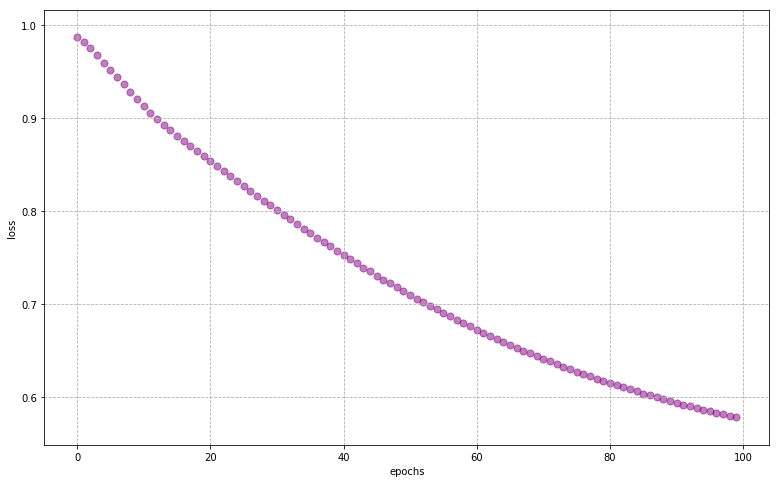

In [169]:
def plot_history(history, figsize=(13, 8), color='purple', s=50, alpha=0.5):
    plt.figure(figsize=figsize)
    plt.grid(zorder=0, linestyle='--')
    plt.scatter(history.epoch, history.history["loss"], c=color, s=s, alpha=alpha)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()
    
    
plot_history(history)

# Evaluating the Trained Model

We can look at the overall loss from our test data after training the model was trained

In [170]:
# Could also just use a batch to evaluate
loss_and_metrics = model.evaluate(x_test, y_test)

loss_and_metrics

60/60 [==============================] - 1s 10ms/step


0.5493672768274943

We can have predictions (probability the data point is a particular class based on our trained model)

In [172]:
probs = model.predict(x_test)
probs[:3]

array([[0.88738054, 0.07999532, 0.03262415],
       [0.87563056, 0.08783441, 0.03653514],
       [0.05251363, 0.48459393, 0.46289238]], dtype=float32)

We want to say what is the predicted class, so we pick just the largest probability for each result

In [173]:
predictions = np.argmax(probs, axis=1)

predictions[:3]

array([0, 0, 1])

In [174]:
np.sum(predictions  == np.argmax(y_test, axis=1)) / predictions.shape

array([0.63333333])

In [175]:
report = classification_report(y_test.argmax(axis=1), predictions, labels=[0, 1, 2])
print(report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.42      1.00      0.59        16
           2       0.00      0.00      0.00        21

    accuracy                           0.63        60
   macro avg       0.47      0.65      0.52        60
weighted avg       0.50      0.63      0.53        60



Finally, we can see how accurate our model was by seeing if the predicted classes match the actual labels. Note that this is calculated differently from how the loss is calculated.

### But Behold!!!! An out of the box RFC comes into the fold! 

In [176]:
from sklearn.ensemble import RandomForestClassifier

In [177]:
clf = RandomForestClassifier()

In [178]:
clf.fit(x_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [184]:
clf_preds = clf.predict(x_test)
clf.score(x_test, y_test)

0.95

In [185]:
report = classification_report(y_test, clf_preds)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.88      0.94      0.91        16
           2       0.95      0.90      0.93        21

   micro avg       0.95      0.95      0.95        60
   macro avg       0.94      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60
 samples avg       0.95      0.95      0.95        60



### Let's add another Layer

In [186]:
### Let's build a new model and add another layer
model_mlp = Sequential()

# hidden layers
model_mlp.add(Dense(input_dim=4, units=4, activation='relu'))
model_mlp.add(Dense(units=4, activation='relu'))

# classifier layer
model_mlp.add(Dense(units=3, activation='softmax'))

model_mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_53 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_54 (Dense)             (None, 3)                 15        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


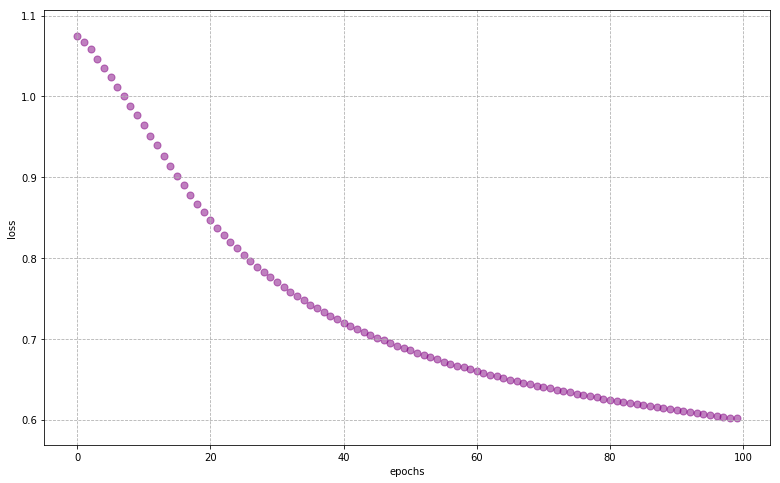

In [187]:
model_mlp.compile(loss=keras.losses.categorical_crossentropy, 
                  optimizer=optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True))

history_mlp = model_mlp.fit(x_train, y_train, epochs=100, batch_size=16, verbose=0)

plot_history(history_mlp)

In [188]:
loss_and_metrics = model_mlp.evaluate(x_test, y_test)

loss_and_metrics

60/60 [==============================] - 1s 10ms/step


0.5440498232841492

In [189]:
probs = model_mlp.predict(x_test)
predictions = np.argmax(probs, axis=1)
np.sum(predictions  == np.argmax(y_test, axis=1)) / predictions.shape

array([0.65])

In [190]:
report = classification_report(y_test.argmax(axis=1), predictions, labels=[0, 1, 2])
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.43      1.00      0.60        16
           2       0.00      0.00      0.00        21

    accuracy                           0.65        60
   macro avg       0.48      0.67      0.53        60
weighted avg       0.50      0.65      0.54        60



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Add another layer and plot the loss

In [ ]:
# Build your model


# Compile it


# fit your model using 100 epochs


In [ ]:
# Evaluate your model


In [ ]:
# Plot your loss
